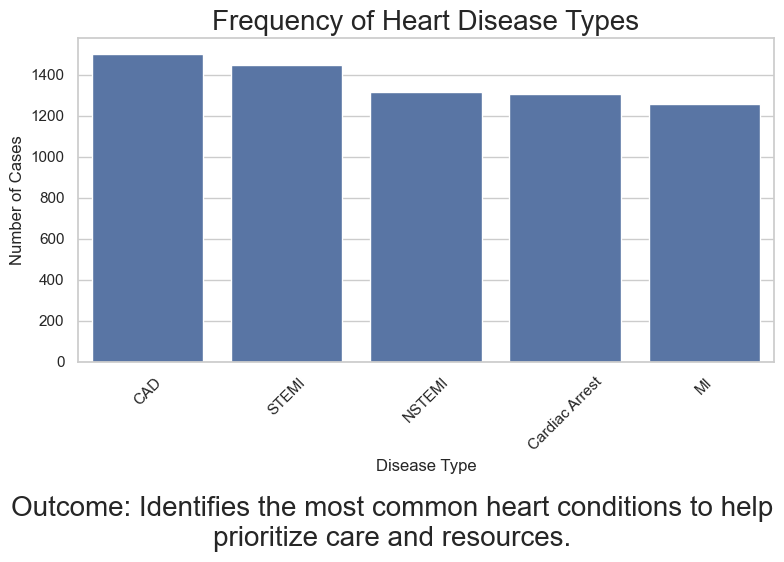

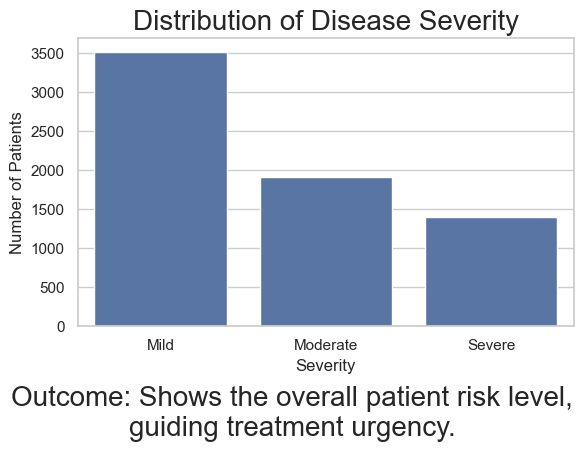

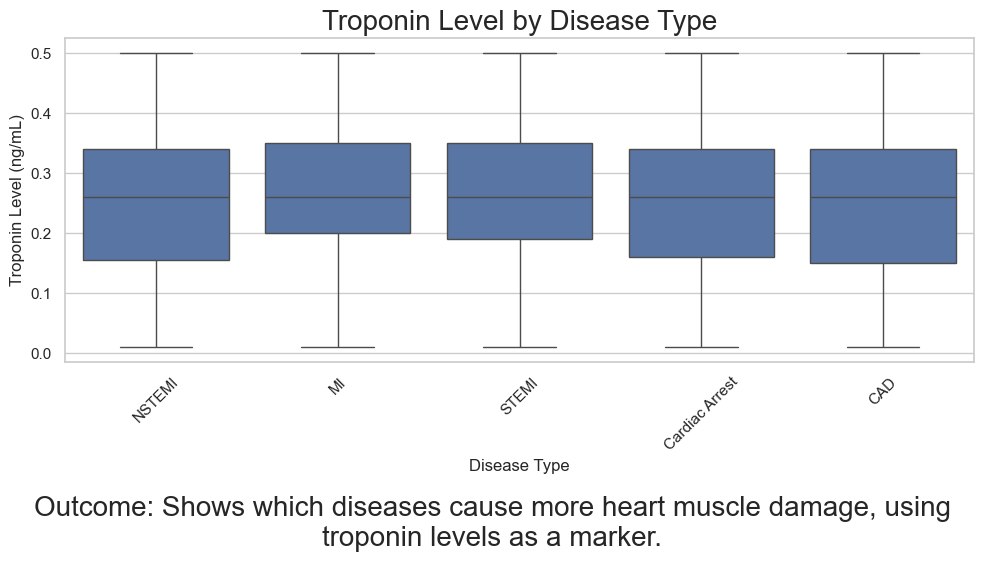

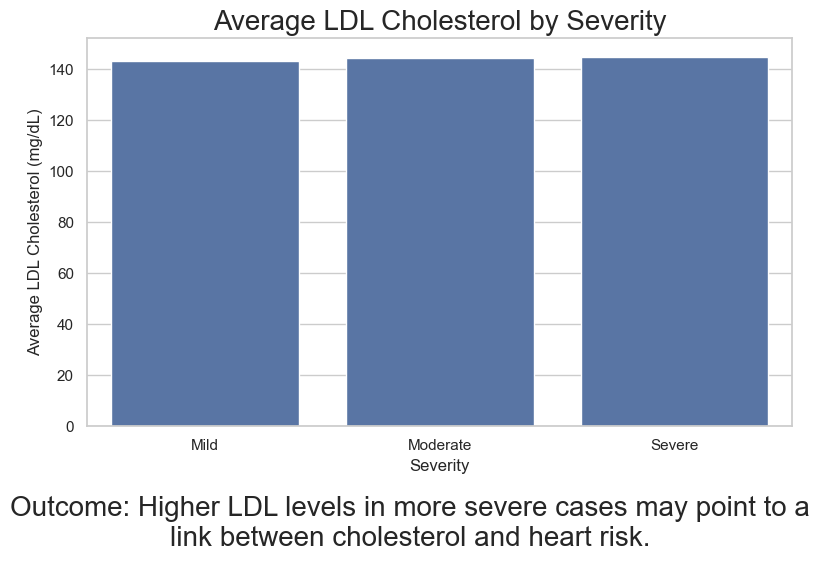

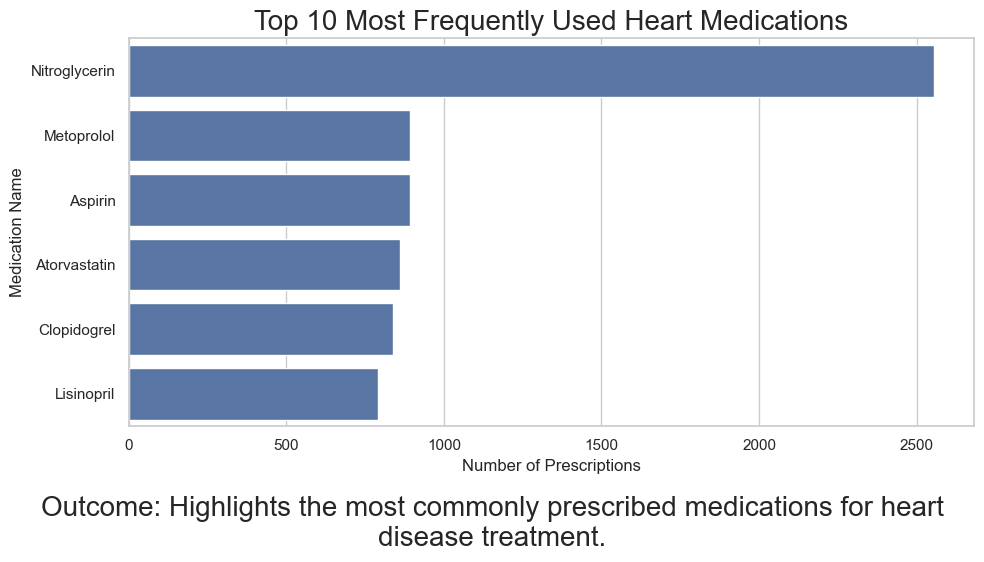

✅ PDF Report generated as 'Heart_Disease_Report.pdf'


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fpdf import FPDF
import os
merged = pd.read_csv("cleaned_merged_patient_data.csv")

# Set Seaborn style
sns.set(style="whitegrid")

# 1. Disease Frequency
plt.figure(figsize=(8, 5))
sns.countplot(data=merged, x='disease_type', order=merged['disease_type'].value_counts().index)
plt.title("Frequency of Heart Disease Types", fontsize=20)
plt.xlabel("Disease Type")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45)
plt.figtext(0.5, -0.1, "Outcome: Identifies the most common heart conditions to help prioritize care and resources.", 
            wrap=True, horizontalalignment='center', fontsize=20)
plt.tight_layout()
plt.show()

# 2. Severity Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=merged, x='severity', order=["Mild", "Moderate", "Severe"])
plt.title("Distribution of Disease Severity", fontsize=20)
plt.xlabel("Severity")
plt.ylabel("Number of Patients")
plt.figtext(0.5, -0.1, "Outcome: Shows the overall patient risk level, guiding treatment urgency.", 
            wrap=True, horizontalalignment='center', fontsize=20)
plt.tight_layout()
plt.show()

# 3. Troponin by Disease Type
plt.figure(figsize=(10, 5))
sns.boxplot(data=merged, x='disease_type', y='troponin_level')
plt.title("Troponin Level by Disease Type", fontsize=20)
plt.xlabel("Disease Type")
plt.ylabel("Troponin Level (ng/mL)")
plt.xticks(rotation=45)

plt.figtext(0.5, -0.1, "Outcome: Shows which diseases cause more heart muscle damage, using troponin levels as a marker.", 
            wrap=True, horizontalalignment='center', fontsize=20)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
ldl_by_severity = merged.groupby('severity')['ldl_cholesterol'].mean().reindex(['Mild', 'Moderate', 'Severe'])
sns.barplot(x=ldl_by_severity.index, y=ldl_by_severity.values)
plt.title("Average LDL Cholesterol by Severity", fontsize=20)
plt.xlabel("Severity")
plt.ylabel("Average LDL Cholesterol (mg/dL)")
plt.figtext(0.5, -0.1, "Outcome: Higher LDL levels in more severe cases may point to a link between cholesterol and heart risk.",
            wrap=True, horizontalalignment='center', fontsize=20)
plt.tight_layout()
plt.show()

# 5. Top 10 Most Frequently Used Medications
plt.figure(figsize=(10, 5))
top_meds = merged['drug_name'].value_counts().nlargest(20)
sns.barplot(x=top_meds.values, y=top_meds.index)
plt.title("Top 10 Most Frequently Used Heart Medications", fontsize=20)
plt.xlabel("Number of Prescriptions")
plt.ylabel("Medication Name")
plt.figtext(0.5, -0.1, "Outcome: Highlights the most commonly prescribed medications for heart disease treatment.",
            wrap=True, horizontalalignment='center', fontsize=20)
plt.tight_layout()
plt.show()
#pdf



output_dir = "report_images"
os.makedirs(output_dir, exist_ok=True)

# Initialize the list of plots and captions
plots = []

# Generate and save each plot with caption
plt.figure(figsize=(8, 5))
sns.countplot(data=merged, x='disease_type', order=merged['disease_type'].value_counts().index)
plt.title("Frequency of Heart Disease Types")
img1_path = f"{output_dir}/disease_frequency.png"
plt.tight_layout()
plt.savefig(img1_path)
plots.append((img1_path, "Identifies the most common heart conditions to help prioritize care and resources."))
plt.close()

plt.figure(figsize=(6, 4))
sns.countplot(data=merged, x='severity', order=['Mild', 'Moderate', 'Severe'])
plt.title("Distribution of Disease Severity")
img2_path = f"{output_dir}/severity_distribution.png"
plt.tight_layout()
plt.savefig(img2_path)
plots.append((img2_path, "Shows the overall patient risk level, guiding treatment urgency."))
plt.close()

plt.figure(figsize=(10, 5))
sns.boxplot(data=merged, x='disease_type', y='troponin_level')
plt.title("Troponin Level by Disease Type")
img3_path = f"{output_dir}/troponin_by_disease.png"
plt.tight_layout()
plt.savefig(img3_path)
plots.append((img3_path, "Shows which diseases cause more heart muscle damage, using troponin as a marker."))
plt.close()

plt.figure(figsize=(8, 5))
ldl_by_severity = merged.groupby('severity')['ldl_cholesterol'].mean().reindex(['Mild', 'Moderate', 'Severe'])
sns.barplot(x=ldl_by_severity.index, y=ldl_by_severity.values)
plt.title("Average LDL Cholesterol by Severity")
img4_path = f"{output_dir}/ldl_by_severity.png"
plt.tight_layout()
plt.savefig(img4_path)
plots.append((img4_path, "Higher LDL levels in more severe cases may point to cholesterol’s role in heart risk."))
plt.close()

plt.figure(figsize=(10, 5))
top_meds = merged['drug_name'].value_counts().nlargest(10)
sns.barplot(x=top_meds.values, y=top_meds.index)
plt.title("Top 10 Most Used Heart Medications")
img5_path = f"{output_dir}/top_medications.png"
plt.tight_layout()
plt.savefig(img5_path)
plots.append((img5_path, "Highlights the most commonly prescribed medications for heart disease treatment."))
plt.close()

# Helper to fix character encoding for PDF
def sanitize_text(text):
    return text.encode('latin-1', 'replace').decode('latin-1')

# Create PDF
pdf = FPDF()
pdf.set_auto_page_break(auto=True, margin=15)

for img_path, caption in plots:
    pdf.add_page()
    
    # Title of the plot
    pdf.set_font("Arial", 'B', 14)
    title = os.path.splitext(os.path.basename(img_path))[0].replace("_", " ").title()
    pdf.cell(0, 10, sanitize_text(title), ln=True, align='C')
    
    # Add image
    img_y = pdf.get_y() + 5
    pdf.image(img_path, x=15, y=img_y, w=180)

    # Move cursor below image
    pdf.set_y(img_y + 110)

    # Add caption as "Outcome"
    pdf.set_font("Arial", '', 12)
    pdf.multi_cell(0, 10, sanitize_text(f"Outcome: {caption}"))

# Save final PDF
pdf.output("Heart_Disease_Report.pdf")
print("✅ PDF Report generated as 'Heart_Disease_Report.pdf'")

